# Baywheels Trips Usage and Duration Characteristics

## Mostafa Atef

## Investigation Overview

> To have a look at the characteristics of trip usage and duration and the attributes that could impact the predication of them.

## Dataset Overview

> The data consisted of more that 80k bike rides. The main attributes are duration_sec, user_type, rental_access_method and start_time, as well as the additional attributes such as start station name, start station latitude, and start station longitude.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df_Q1_2020 = pd.read_csv('baywheels_trips_Q1_2020_cleaned.csv',parse_dates=True,low_memory=False)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Baywheels Trip Data Usage by Hour

> Most of the trips are happened at (07-09) and (16-18), for work commute, going to work and returing from work

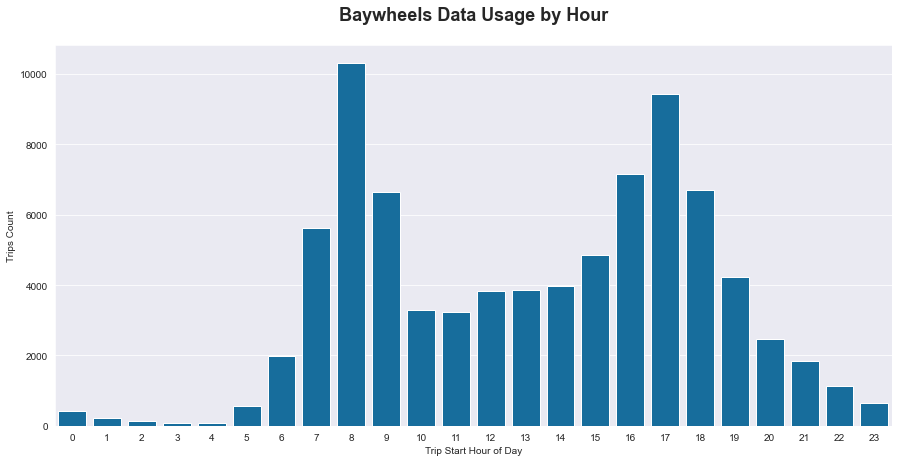

In [7]:
# Trip rates over day hours

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(15,7))

sb.countplot(data=df_Q1_2020, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day')
plt.ylabel('Trips Count')
plt.title('Baywheels Data Usage by Hour', y=1.05, fontsize=18, fontweight='bold');

## Baywheels Trips Data Duration in Mintues

> Most of the trips duration are between 5 to 8 minutes, with average of 12 Min, Minmum of 1 Min, Maximum of 491 Min and Mode of 9 Min.

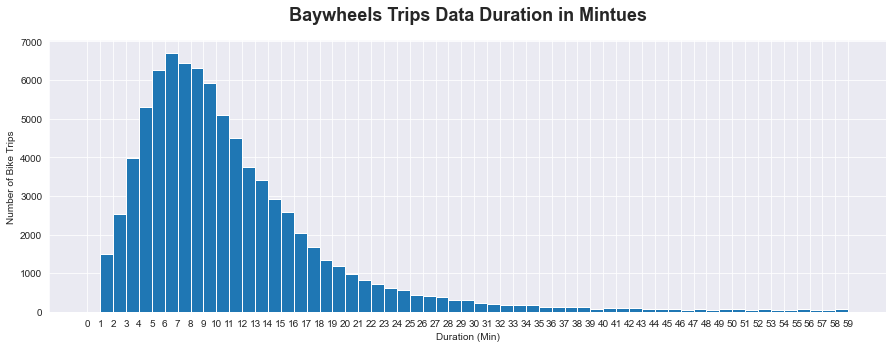

In [9]:
# Duration of the bike rides in minutes

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(15,5))

bin_edges = np.arange(0, 60, 1)

plt.hist(data = df_Q1_2020, x = 'duration_minute', bins = bin_edges);

plt.title("Baywheels Trips Data Duration in Mintues", y=1.05, fontsize=18, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips')
plt.xticks(bin_edges);

## Trip Duration Distribution vary Between User Type
> The trip duration distribution is much narrower for subscribers and shorter trip as welll. subscribers seem to have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer time.


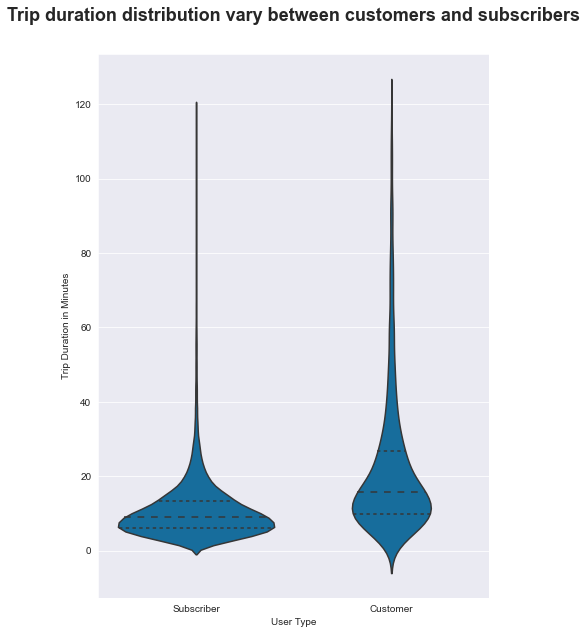

In [14]:
# Trip duration distribution vary between customers and subscribers

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(7,10))

sb.violinplot(data=df_Q1_2020[df_Q1_2020['duration_minute']<=120], x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minutes');
plt.title("Trip duration distribution vary between customers and subscribers", y=1.05, fontsize=18, fontweight='bold');

## Hourly Usage vary During Week Days by User Type
> Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 7-9am and 16-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 12-16pm Saturday to Sunday, weekend.

<Figure size 432x288 with 0 Axes>

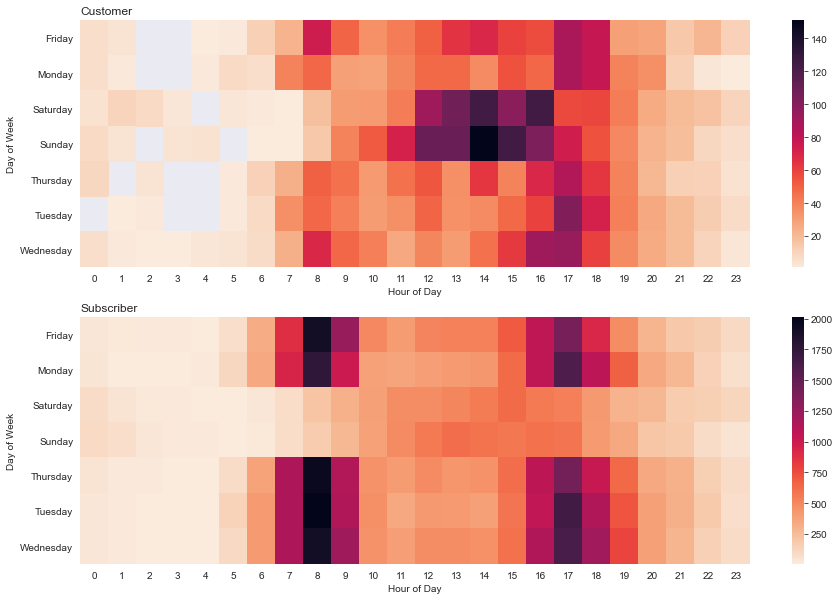

In [15]:
# The hourly usage vary during weekdays for customers and subscribers

plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

sb.set_style('darkgrid')
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)

customers = df_Q1_2020.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_Q1_2020.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!